* Weihao Li
* R Version 3.3.2(ubuntu16.04 LTS)

# MTH9879 Homework 6

Assigned: March 21, 2017.
Due: April 4, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 0. (0 points) 
Read the review article by McAleer and Medeiros and also the nice article by Barndorff-Nielsen et al.

## Comparison of estimators

### Download RV estimator code

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

### 1. (12 points) 
This assignment uses the *tqBAC* dataset from *tq.rData* and the RV estimators from *RvEstimators.R*.

In [2]:
load('tq.rData')
library(highfrequency)
source('RvEstimators.R')

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



(a) Consider the BAC trade price series.  Superimpose signature plots of the following estimators with subsampling frequency $q$ from 1 to 20: ZHOU, TSRV, MSRV, KRVTH, KRVC.  Express your results as $\sqrt{RV}$ to make them more intuitive, as in Table 1 of Lecture 6 (recall that volatility estimates should be of the order of $2\%$!).
<br>
Pay attention to good aesthetics, addling a proper legend to your plot.

(b) Repeat part (a) for the BAC mid-quote series.

(c) Which of these estimators do you recommend and why?  What sub-sampling frequency do you recommend based on these pictures?

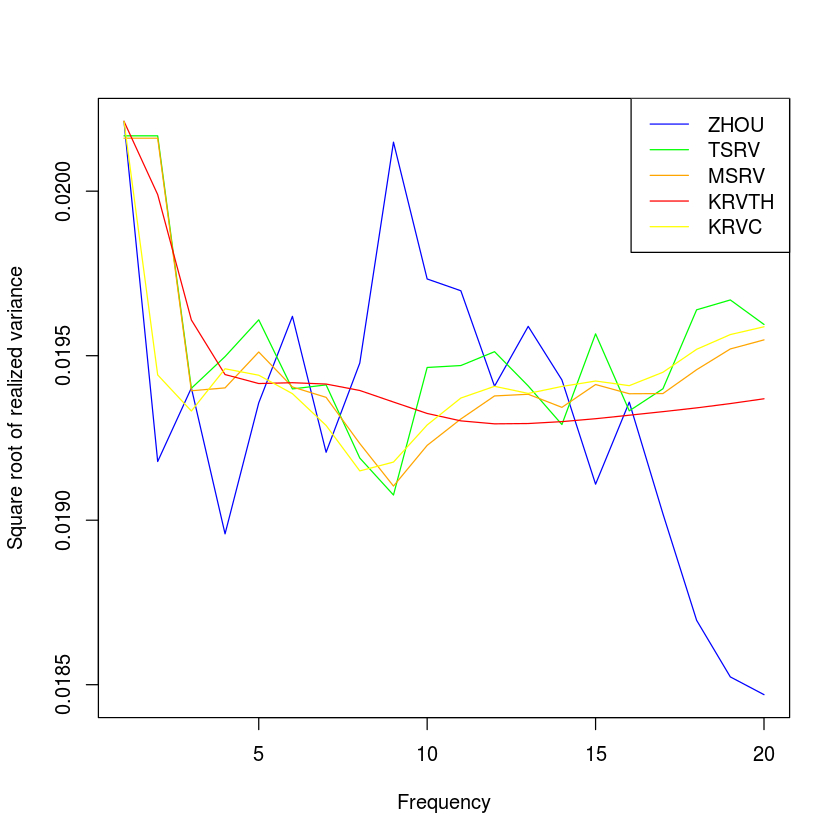

In [3]:
#Solution to question (a)

tq_price<-tqBAC$PRICE

#change to log price
tq_log<-log(as.numeric(tq_price))

nn = 20
RV_ZHOU =sapply(1:20,function(q)(sqrt(ZHOU(tq_log,q)))) 
RV_TSRV =sapply(1:20,function(q)(sqrt(TSRV(tq_log,q)))) 
RV_MSRV =sapply(1:20,function(q)(sqrt(MSRV(tq_log,q)))) 
RV_KRVTH =sapply(1:20,function(q)(sqrt(KRVTH(tq_log,q)))) 
RV_KRVC =sapply(1:20,function(q)(sqrt(KRVC(tq_log,q)))) 
    
plot(1:nn, RV_ZHOU, col="blue", type='l', ylab='Square root of realized variance', xlab='Frequency')
lines(RV_TSRV, col="green")
lines(RV_MSRV, col="orange")
lines(RV_KRVTH, col="red")
lines(RV_KRVC , col="yellow")
legend("topright", c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),lty = c(1,1,1,1,1), 
       col=c("blue","green","orange","red","yellow"))

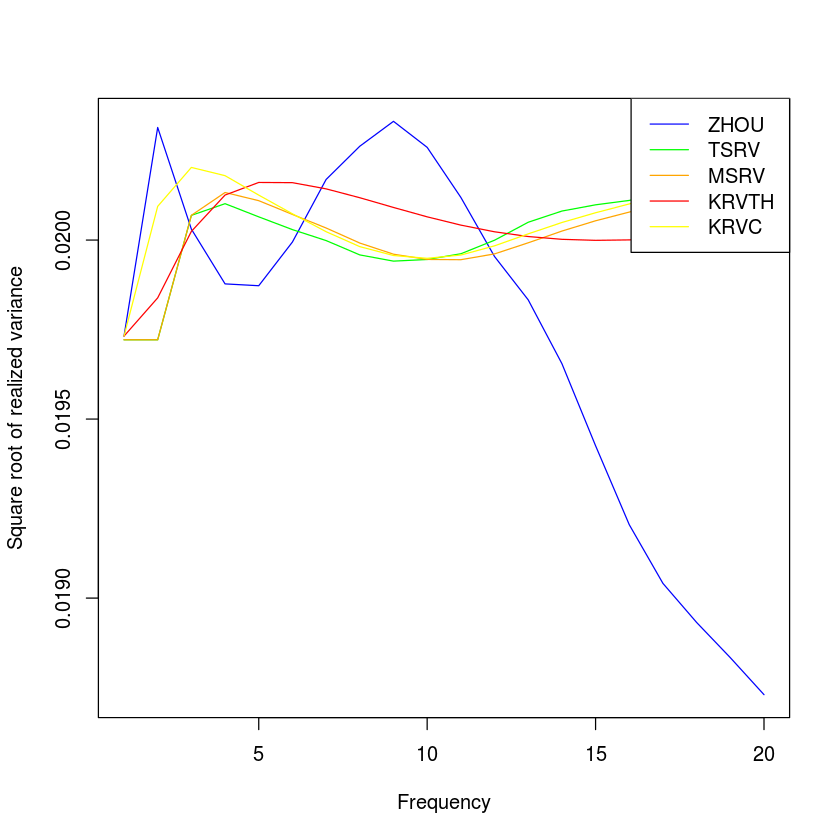

In [4]:
# solution to (b)

tq_price<-(as.numeric(tqBAC$BID)+as.numeric(tqBAC$OFR))/2

#change to log price
tq_log<-log(as.numeric(tq_price))

nn = 20
RV_ZHOU =sapply(1:20,function(q)(sqrt(ZHOU(tq_log,q)))) 
RV_TSRV =sapply(1:20,function(q)(sqrt(TSRV(tq_log,q)))) 
RV_MSRV =sapply(1:20,function(q)(sqrt(MSRV(tq_log,q)))) 
RV_KRVTH =sapply(1:20,function(q)(sqrt(KRVTH(tq_log,q)))) 
RV_KRVC =sapply(1:20,function(q)(sqrt(KRVC(tq_log,q)))) 
    
plot(1:nn, RV_ZHOU, col="blue", type='l', ylab='Square root of realized variance', xlab='Frequency')
lines(RV_TSRV, col="green")
lines(RV_MSRV, col="orange")
lines(RV_KRVTH, col="red")
lines(RV_KRVC , col="yellow")
legend("topright", c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),lty = c(1,1,1,1,1), 
       col=c("blue","green","orange","red","yellow"))

#### solutions to (c)

* As the plot shows, KRVTH converges fast and is the smoothest and most stable one. So I recomended KRVTH
* Choosing a frequency around 12 would be appropriate. Since KRVTH remain stable after it.

<font color=red>COMMENT: also consider the $q$ that minimizes the differences between trade-based and quote-based estimates.</font>

## The Epps effect

### 2. (14 points) 
For this assignment, use the *tqBAC* and  *tqC* datasets from *tq.rData*, the function *getSymbols* from the *quantmod* package, and the function *aggregatets* from the * highfrequency* package.

In [5]:
load('tq.rData')
library(highfrequency)
library(quantmod)

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘quantmod’

The following objects are masked from ‘package:highfrequency’:

    getPrice, has.Qty



(a) Write a function to aggregate a *tq* object (such as *tqBAC*) to the nearest $k$ seconds. <br>
(Hint: Use the function *aggregatets(.)*).

(b) Write a function to compute the correlation between two high-frequency log return series (in *tq* format) where the underlying prices have been aggregated to the nearest $k$ seconds.

(c) Plot the correlation between BAC and C returns where these returns are sampled every $k$ seconds, with $ k  \in \{2,3,4,. .., 599,600\} $.  Use a kernel smoothing function such as *ksmooth* to smooth your results.  Make sure the aesthetics are good with nice labels etc.

(d)  Is your plot consistent with the Epps effect?  What was the intraday correlation between BAC and C returns on 04-May-2012?

(e) Use the function *getSymbols* from *quantmod* to download daily data for BAC and C from 01-Jan-2012 to 31-Dec-2012.  What was the historical correlation of daily BAC and C returns over that period?

In [6]:
#solution a
#function to aggregate a tq object 
aggregate_tq<-function(tq,k){
    return (aggregatets(tq, k=k, on="seconds"))
}

In [7]:
#solution b
#function to compute the correlation between two high-frequency log return series
corr_logreturns<-function(tq1,tq2){
 
    return (cor(tq1,tq2))
}


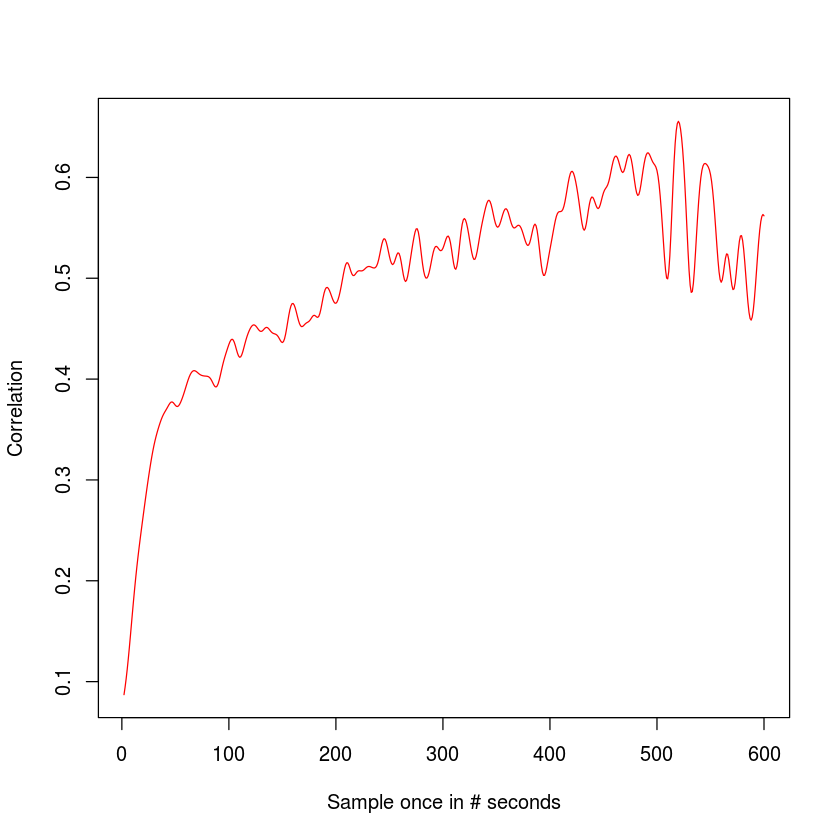

In [8]:
#solution c 
#Plot the correlation between BAC and C returns where these returns are sampled every kk seconds
options(warn=-1)
tq_to_corr<-function(tq1,tq2,k){
    
    
    tq_logreturn1<-diff(log(as.numeric(aggregate_tq(tq1,k)$PRICE)))
    

    tq_logreturn2<-diff(log(as.numeric(aggregate_tq(tq2,k)$PRICE)))
    
    return(corr_logreturns(tq_logreturn1,tq_logreturn2))
}



plot_corr<-function(tq1,tq2){
    nn = 600
    tqrr <- sapply(2:nn,function(q){tq_to_corr(tq1,tq2,q)})
    plot(2:nn, ksmooth(2:nn, tqrr, kernel =  "normal", bandwidth = 10)$y, col="red", type='l', ylab='Correlation', xlab='Sample once in # seconds')
        }
                    
plot_corr(tqBAC,tqC)

#### solution to d
* Yes, it is. As we can see, if the sampling freequence decrease, the estimater will become larger.
* The intraday correlation is :0.0429915308421487

<font color="red">Why use 2 seconds ? You can use any number. From the above chart you can see that higher number gives more stable result, so probably makes more sense -1pt</font>

In [9]:
(tq_to_corr(tqBAC,tqC,2))

[1] 0.04299153

In [10]:
#solution to e 
options(warn=-1)
# get symbols

getSymbols("BAC", src = "yahoo", from = "2012-01-01", to = "2012-12-31")
getSymbols("C"  , src = "yahoo", from = "2012-01-01", to = "2012-12-31")



tqbac_return <- diff(log(as.numeric(BAC$BAC.Adjusted)))
tqc_return   <- diff(log(as.numeric(C$C.Adjusted)))
cor(tqbac_return, tqc_return)

    As of 0.4-0, ‘getSymbols’ uses env=parent.frame() and
 auto.assign=TRUE by default.

 This  behavior  will be  phased out in 0.5-0  when the call  will
 default to use auto.assign=FALSE. getOption("getSymbols.env") and 
 getOptions("getSymbols.auto.assign") are now checked for alternate defaults

 This message is shown once per session and may be disabled by setting 
 options("getSymbols.warning4.0"=FALSE). See ?getSymbols for more details.


[1] "BAC"

[1] "C"

[1] 0.7999082

## The Hayashi-Yoshida estimator

### 3. (2 points) 
Show that when two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, the Hayashi-Yoshida estimator coincides with the realized covariance estimator.

#### solution to (3)
* The Hayashi-Yoshida estimator is written as:
$$HY_t=\sum_{i \leq t}\,\sum_{j \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\,v_{ij}$$
where

$$v_{ij}={\bf 1}_{[t_{i-1},t_i] \cap [t_{j-1},t_j] \neq \emptyset}$$
* When $p^{(1)}$ and $p^{(2)}$ are synchronous, $v_{ij} = 1$ 
\begin{equation}
HY_t = \sum_{i \leq t}\,\sum_{j \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\,v_{ij}
= \sum_{i=1}^t\Delta p^{(1)}_i \Delta p^{(2)}_i
\end{equation}
* When we calculate the Hayashi-Yoshida estimator in the whole T time interval,it becomes:
\begin{equation}
HY_t = \frac1T\sum_{i=1}^T\Delta p^{(1)}_i \Delta p^{(2)}_i
\end{equation}
* Which is the realised covariance estimator

## Fulvio Corsi's HAR-RV model

The following code loads the data of SPX realized volatility required for this problem. Data were downloaded from the Oxford-Man website

In [11]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/spx_krv.rData_.zip", destfile="spx_krv.zip")
unzip(zipfile="spx_krv.zip")
load("spx_krv.rData")

In [12]:
data.frame(head(spx.krv))

,head.spx.krv.
2000-01-03,0.0001607266
2000-01-04,0.0002643965
2000-01-05,0.0003046503
2000-01-06,0.0001485821
2000-01-07,0.0001232670
2000-01-10,0.0001306934


### 4. (12 points)

(a) Rerun the HAR-RV example code using the 2008 *DJI_RV* sample from the *highfrequency* package.

(b) Repeat the analysis of part (a) with *spx.krv* restricted to 2008.

(c) Tabulate the HAR-RV coefficients for the two 2008 datasets.  Are they similar or do they differ?  Is most weight on the 1-day, 5-day, or 22-day RV?

(d) Using *quantmod* download daily VIX data.  Subset this data to 2008 and plot ${\rm VIX}^2$.

(e)  Plot SPX RV and superimpose DJI RV for 2008. Superimpose a plot of $\text{VIX}^2$, adding a scale on the right hand axis (see how this is done in the lecture iPython notebook). Comment on the resulting plot.



Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0017683 -0.0000626 -0.0000427 -0.0000087  0.0044331 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 4.432e-05  3.695e-05   1.200   0.2315    
beta1 1.586e-01  8.089e-02   1.960   0.0512 .  
beta2 6.213e-01  1.362e-01   4.560 8.36e-06 ***
beta3 8.721e-02  1.217e-01   0.716   0.4745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004344 on 227 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4608 
F-statistic: 66.53 on 3 and 227 DF,  p-value: < 2.2e-16

[1] ‘0.9.7’


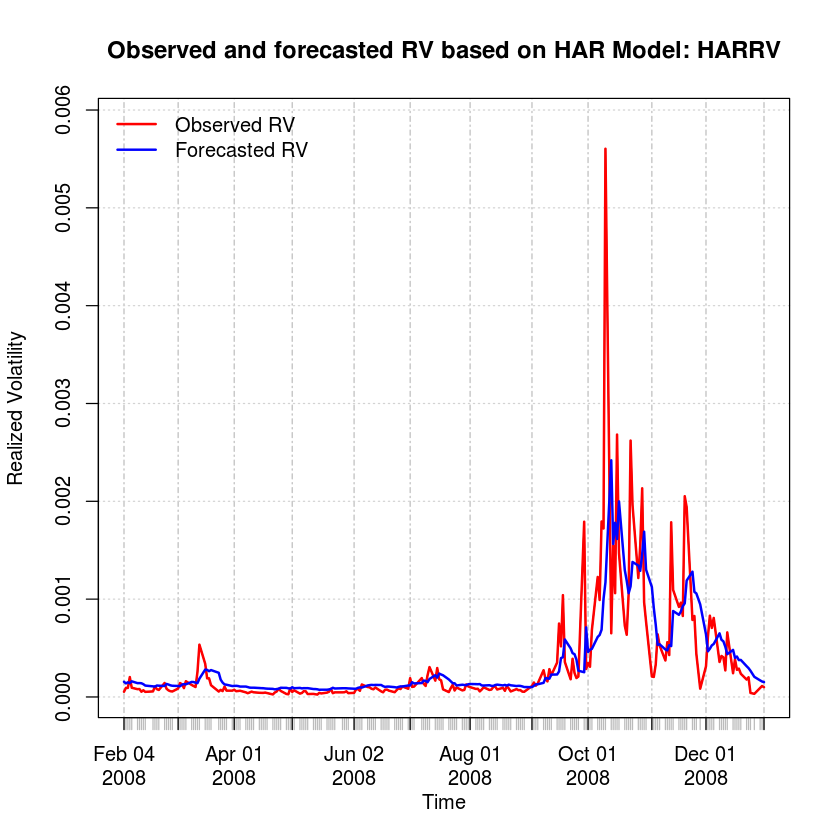

In [13]:
# solution to Question a:
data(realized_library); #Get sample daily Realized Volatility data
DJI_RV <- realized_library$Dow.Jones.Industrials.Realized.Variance; #Select DJI
plot_harrv<- function(data){
    data <- data[!is.na(data)] #Remove NA's
    data <- data['2008']
    x <- harModel(data=data , periods = c(1,5,22), RVest = c("rCov"), type="HARRV",h=1,transform=NULL)
    
    print(summary(x))
    plot(x)
    }
plot_harrv(DJI_RV)


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0022396 -0.0001219 -0.0000725 -0.0000176  0.0079141 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 7.164e-05  5.960e-05   1.202  0.23067    
beta1 1.523e-01  8.218e-02   1.853  0.06526 .  
beta2 5.512e-01  1.415e-01   3.896  0.00013 ***
beta3 1.501e-01  1.324e-01   1.134  0.25801    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0006787 on 220 degrees of freedom
Multiple R-squared:  0.4096,	Adjusted R-squared:  0.4015 
F-statistic: 50.87 on 3 and 220 DF,  p-value: < 2.2e-16

[1] ‘0.9.7’


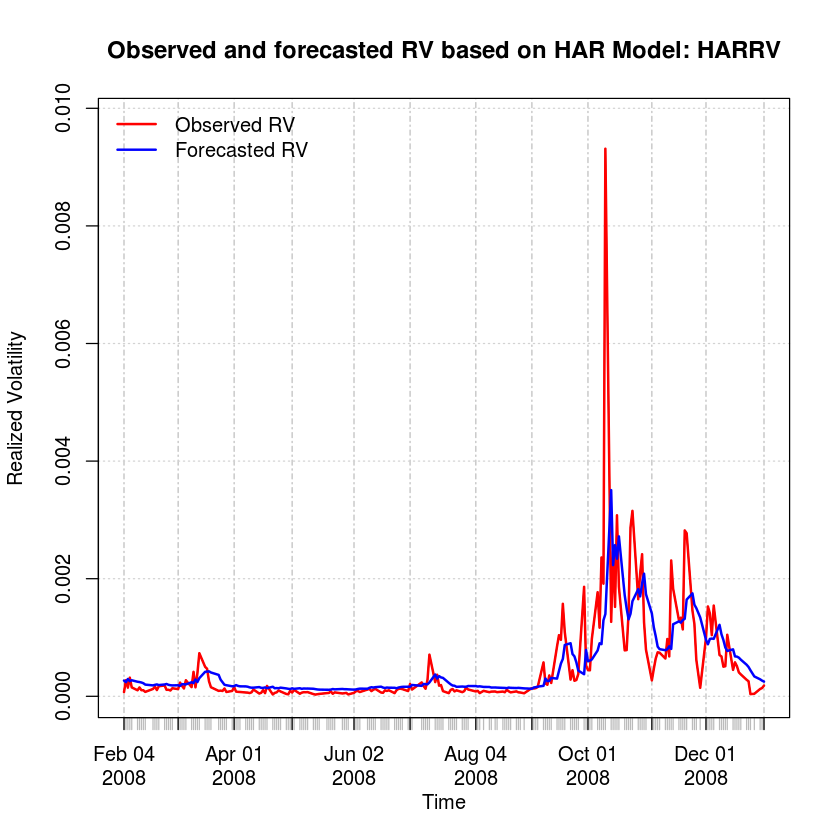

In [14]:
#solution to b
plot_harrv(spx.krv)

#### Solution to question c
|   Coef     |  DJI RV   |  SPX KRV  |
|------------|-----------|-----------|
| $\beta_0$  | 4.432e-05 | 7.164e-05 |
| $\beta_1$  | 1.586e-01 | 1.523e-01 |
| $\beta_2$  | 6.213e-01 | 5.512e-01 |
| $\beta_3$  | 8.721e-02 | 1.501e-01 |
* They are similar, and the most weight is on the 5 day RV.

[1] "VIX"

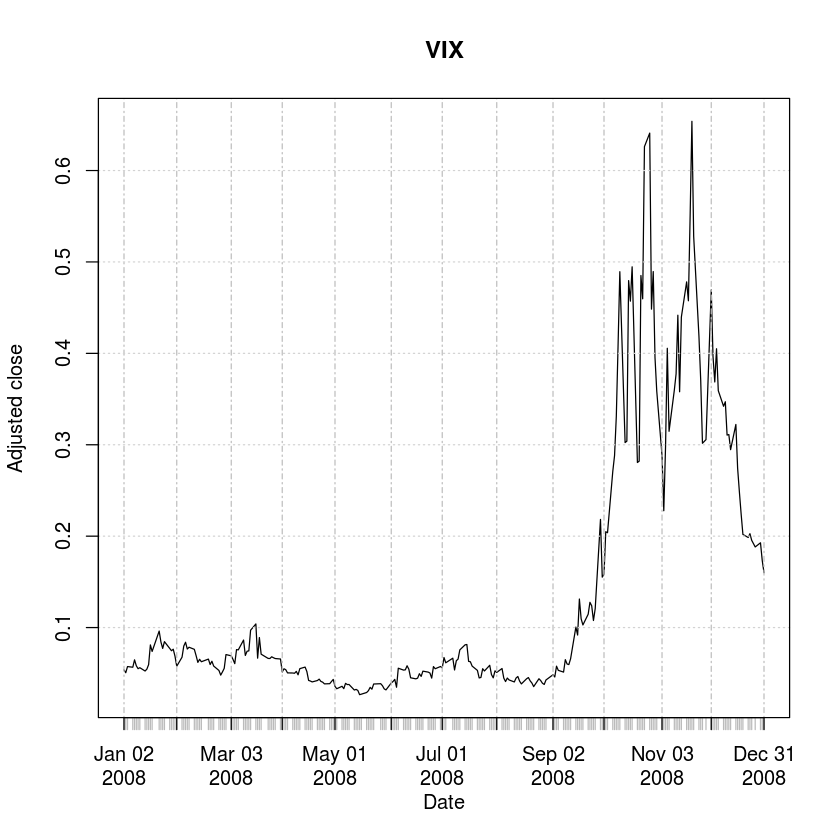

In [17]:
#solution to d
getSymbols("^VIX", src = "yahoo", from = "2008-01-01", to = "2008-12-31")
VIX2 = (VIX$VIX.Adjusted*VIX$VIX.Adjusted)/10000
plot(VIX2 , main = "VIX", ylab="Adjusted close", xlab="Date")

[1] "xts" "zoo"


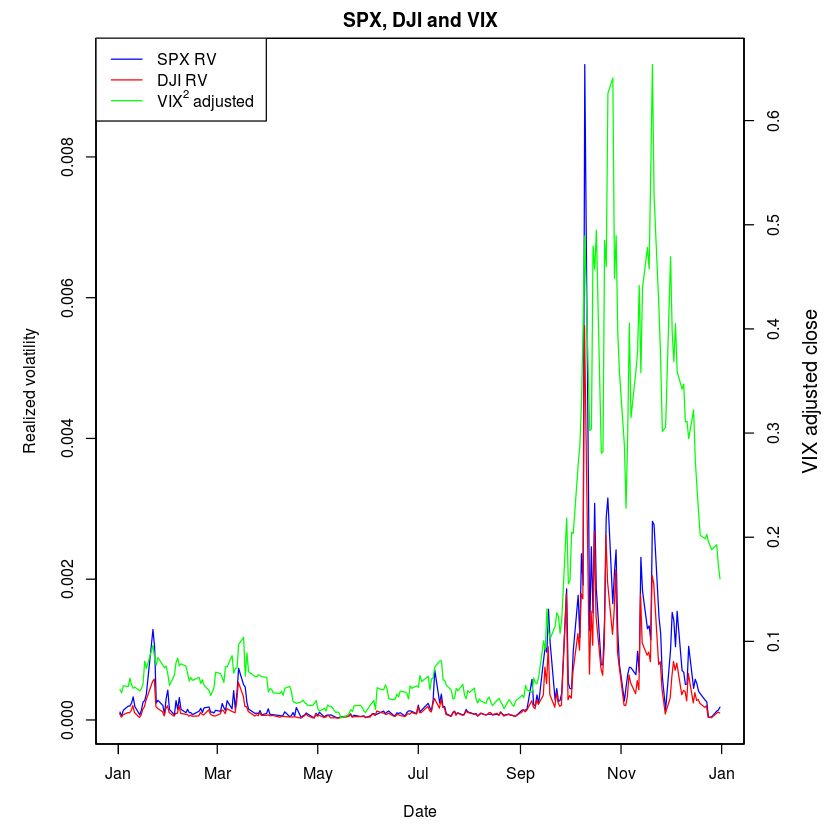

In [20]:
# solution to e

clean_data <-function(data){
    
    "
        clean and select
     "
    data <- data[!is.na(data)] #Remove NA's
    data <- data['2008']
    return (data)
}


par(mar = c(5,5,2,5),cex=0.8)
DJI_RV <-clean_data(DJI_RV)
SPX_RV <-clean_data(spx.krv)
basket <-cbind(SPX_RV,DJI_RV )

print(class(VIX$VIX.Adjusted))
zoo.basket <-as.zoo(basket)

plot(x = as.zoo(SPX_RV),col = 'blue', main="SPX, DJI and VIX", ylab="Realized volatility", xlab="Date" )
lines( as.zoo(DJI_RV),col = 'red')


par(new = T)
plot(as.zoo(VIX2), col="green", axes=F, main=NA, xlab=NA, ylab=NA)


axis(side = 4)
mtext(side = 4, line = 3, "VIX adjusted close")
legend("topleft",legend=c("SPX RV ","DJI RV", expression(paste(VIX^2," adjusted"))),col=c( "blue","red", "green"),lwd=c(1,1,1))